In [7]:
import pandas as pd

In [8]:
reviews = pd.read_csv("ign.csv")

In [9]:
"""
Questions

1. What’s the first game ever released?
2. Do game scores vary from year to year?
3. What’s the platform with the highest average reviews?
4. Are blockbuster games released at a specific time of the year?
"""
None

In [10]:
reviews["release_year"].min()

1970

In [11]:
reviews[reviews["release_year"] == 1970]

,Unnamed: 0,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
516,516,Great,The Walking Dead: The Game -- Episode 1: A New...,/games/the-walking-dead-season-1-episode-1/xbo...,Xbox 360,8.5,Adventure,N,1970,1,1


In [12]:
#title is not correct for oldest title so we will remove this entry
reviews.drop([516], axis=0,inplace=True)

In [13]:
reviews["release_year"].min()

1996

In [14]:
oldest_game = reviews[reviews["release_year"] == 1996]

In [15]:
oldest_game["release_month"].min()

6

In [16]:
oldest_game["release_day"].min()

2

In [17]:
oldest_game[(oldest_game["release_month"] == 6)] #[(oldest_game["release_day"] == 2)]

,Unnamed: 0,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
515,515,Good,Baku Baku,/games/baku-baku/saturn-194,Saturn,7.0,Puzzle,N,1996,6,18


In [18]:
#alternative method:
reviews.sort_values(by=["release_year",'release_month','release_day']).reset_index().loc[0]

index                                     515
Unnamed: 0                                515
score_phrase                             Good
title                               Baku Baku
url               /games/baku-baku/saturn-194
platform                               Saturn
score                                       7
genre                                  Puzzle
editors_choice                              N
release_year                             1996
release_month                               6
release_day                                18
Name: 0, dtype: object

In [19]:
# Question 2. Do game scores vary from year to year?
score_by_year = reviews[["score","release_year"]]

In [20]:
avg = score_by_year.groupby(["release_year"]).mean()
avg


,score
release_year,
1996,6.161745
1997,6.566341
1998,6.930678
1999,6.983484
2000,6.693589
2001,7.120494
2002,6.978526
2003,7.198246
2004,7.170712


Text(0.5, 1.0, 'Average Game Scores by Year')

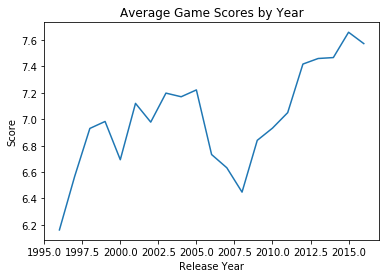

In [31]:
import matplotlib.pyplot as plt
plt.plot(avg)
plt.ylabel('Score')
plt.xlabel("Release Year")
plt.title('Average Game Scores by Year')


In [32]:
#Question 3. What’s the platform with the highest average reviews?

In [44]:
q3 = reviews[["score","platform"]]
q3_grouped = q3.groupby(["platform"]).mean()
q3_grouped

,score
platform,
Android,7.546154
Arcade,6.036364
Atari 2600,5.900000
Atari 5200,8.000000
Commodore 64/128,6.416667
DVD / HD Video Game,1.000000
Dreamcast,7.370280
Dreamcast VMU,3.000000
Game Boy,7.813636


In [46]:
q3_grouped.sort_values(by=['score']).reset_index().loc[0:]

,platform,score
0,DVD / HD Video Game,1.000000
1,Dreamcast VMU,3.000000
2,Game.Com,5.333333
3,Sega 32X,5.450000
4,Atari 2600,5.900000
5,Arcade,6.036364
6,Game Boy Color,6.193820
7,Vectrex,6.250000
8,Nintendo DS,6.286986
9,Wii,6.299268


In [ ]:
#Question 4

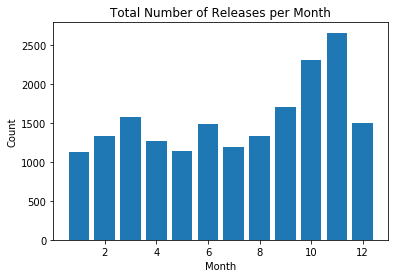

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



blockbusters_df = reviews[(reviews["score_phrase"] == "Amazing") | (reviews["score_phrase"] == "Masterpiece")]

blockbusters_df = reviews.groupby('release_month') \
       .agg({'release_month':'count'}) \
       .rename(columns={'release_month':'count'}) \
       .reset_index()

plt.bar(blockbusters_df["release_month"], blockbusters_df["count"])
plt.ylabel("Count")
plt.xlabel("Month")
plt.title('Total Number of Releases per Month')

plt.show()
